In [ ]:
import kagglehub

In [ ]:
data_path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print(f"Data downloaded to: {data_path}")

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(f"{data_path}//books.csv")
df.head(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0


In [6]:
df.shape

(6810, 12)

## Data Exploration and Preprocessing

In [7]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

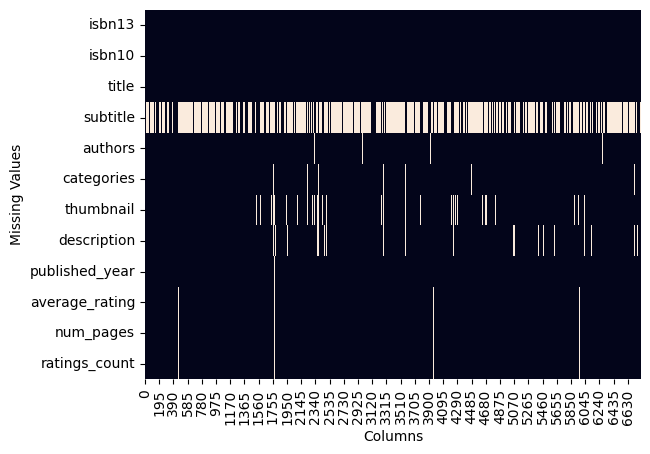

In [9]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

In [10]:
df["missing_description"] = np.where(df["description"].isnull(),1,0)
df["book_age"] = 2025 - df["published_year"]

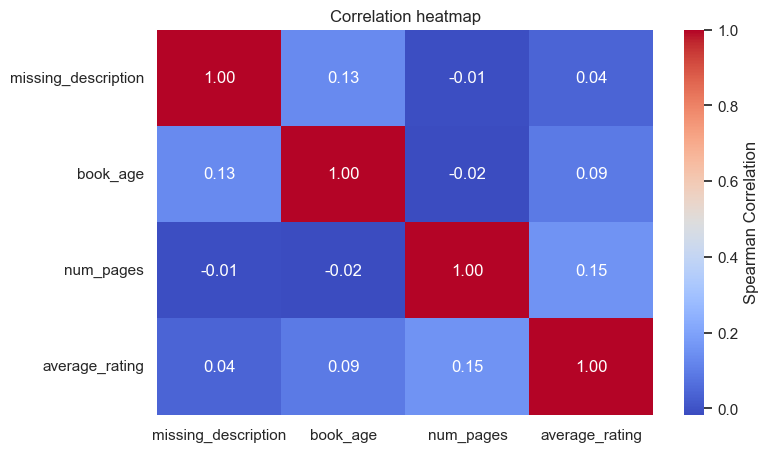

In [11]:
# Checking if missing description has any correlation with "book age" - recent new books may have not been read so description is missing or "no. of pages" - very short book may lack description, etc..
col_interested = ["missing_description", "book_age", "num_pages", "average_rating"]

correlation_matrix = df[col_interested].corr(method = "spearman")

sns.set_theme(style = "darkgrid")
plt.figure(figsize = (8,5))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap = "coolwarm",
                      cbar_kws={"label" : "Spearman Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [12]:
# Books dataframe with no missing values in ["description", "num_pages", "average_rating", "published_year"]
books = df[-(df["description"].isna()) &
                  -(df["num_pages"].isna()) &
                  -(df["average_rating"].isna()) &
                  -(df["published_year"].isna())
                ]

In [13]:
books.shape

(6507, 14)

In [14]:
books.isnull().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
book_age                  0
dtype: int64

In [15]:
# Check books categories
books["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


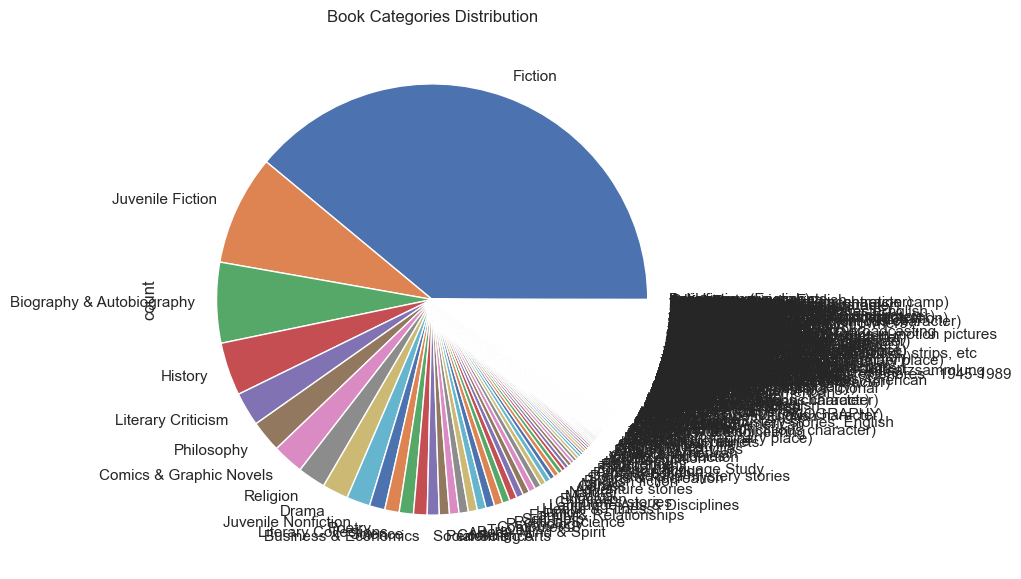

In [16]:
books["categories"].value_counts().plot(kind="pie", figsize=(13,7))
plt.title("Book Categories Distribution")
plt.show()

###### There are a lot too many categeories, we do need handle this. But for now we skip this. 

In [17]:
# Get no. of words present in the description of each book
books["description_words"] = books["description"].str.split().str.len()
books.head(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,description_words
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14


In [18]:
books.loc[books["description_words"].between(1, 10), "description"]

6                                               Donation.
11                                         Fantasy-roman.
77                         Nonsense rhyming story. 4 yrs+
104                        Library of Liberal Arts title.
241     Originally published: [New York]: Clarion Book...
                              ...                        
6721                                              Horror.
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6794                                 源氏物語54帖、「宮田切り絵」の真骨頂。
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 157, dtype: object

In [19]:
books.loc[books["description_words"].between(10, 20), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
                              ...                        
6759    Scott Pilgrim's fantastic life takes an unfors...
6767    Everything from the fingerprints of the gods t...
6776    Raymond Chandler meets The Exorcist. Classic n...
6783    Basics Illustration 01: Thinking Visually expl...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 779, dtype: object

In [20]:
books["description"].loc[100]

"Forty-nine stories reflect much of the intensity of Hemingway's own life and environment"

In [21]:
books["description"].loc[6730]

'Nineteen writers dig into the spaces between genres and bring up gems of new fiction.'

In [22]:
books.loc[books["description_words"].between(20, 30), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
21      Reissue of the author's most famous and well-l...
36      A magical and fantastic collection of early st...
46      No one believes a little girl when she insists...
                              ...                        
6766    Discusses the historical and intellectual back...
6779    Edited by the creator and executive producer o...
6782    Displays one of America's leading physicist's ...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1200, dtype: object

In [23]:
desc = books["description"].loc[171]
print(desc)
len(desc.split())

Cross Damon, trapped within his own blackness, flees from Chicago's South Side to Harlem, where he joins the Communist Party.


20

In [24]:
desc = books["description"].loc[6765]
print(desc)
len(desc.split())

Presents a collection of articles that examine various aspects of the war on drugs, including its political, historical, and economic aspects.


21

In [25]:
desc = books["description"].loc[6789]
print(desc)
len(desc.split())

Provides an introduction to the American artist's work, presenting examples of his works with a discussion of their historical background and critical interpretation.


23

In [26]:
books.loc[books["description_words"].between(30, 40), "description"]

9       Kate Blackwell is an enigma and one of the mos...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
39      "The two works 'On fairy-stories' and 'Leaf by...
46      No one believes a little girl when she insists...
                              ...                        
6768    Citing a harrowing lack of adequate shelter an...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
6801    Forster's lively, informed originality and wit...
Name: description, Length: 1462, dtype: object

In [27]:
len(books.loc[books["description_words"]>=23, "description"])

5403

In [28]:
len(books.loc[books["description_words"]>=24, "description"])

5299

In [ ]:
# Filter books with at least 23 words in the description
books_final = books.loc[books["description_words"]>=23]
books_final.shape

(5403, 15)

In [30]:
books_final["title_subtitle"] = np.where(books_final["subtitle"].isnull(), books_final["title"],
                                         books_final[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))

In [31]:
books_final.head(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,description_words,title_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels


In [32]:
books_final["tagged_description"] = books_final[["isbn13", "description"]].astype(str).agg(": ".join, axis=1)

In [33]:
books_final.drop(["isbn10", "subtitle", "missing_description", "book_age", "description_words"], axis=1, inplace=True)

In [34]:
books_final["title"].duplicated().sum()

245

In [35]:
books_final.drop_duplicates(subset=["title"], inplace=True)
books_final.shape

(5158, 12)

In [36]:
books_final.head(3)

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_subtitle,tagged_description
0,9780002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883: A NOVEL THAT READERS and critic...
1,9780002261982,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...
3,9780006178736,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736: A memorable, mesmerizing heroin..."


In [37]:
%cd ..

d:\My Projects\Book Recommender


In [ ]:
# Create directory to save the final cleaned dataset
import os
os.makedirs("artifacts/semantic_booksdata")

books_final.to_csv("artifacts/semantic_booksdata/clean_books_dataset.csv", sep=";", index=False)

## Get Vector Embeddings for Semantic Recommender

In [43]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [44]:
type(books_final["tagged_description"])

pandas.core.series.Series

In [45]:
os.makedirs("artifacts/vector_embeddings")

books_final["tagged_description"].to_csv("artifacts/vector_embeddings/tagged_description.txt",
                                        sep = "\n", index = False, header = False)

In [46]:
raw_docs = TextLoader("artifacts/vector_embeddings/tagged_description.txt").load()

In [ ]:
# Split the documents into chunks
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator='\n')
docs = text_splitter.split_documents(raw_docs)

In [48]:
docs[3]

Document(metadata={'source': 'artifacts/vector_embeddings/tagged_description.txt'}, page_content="9780006280897: Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dangerous.")

In [49]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("GOOGLE_API_KEY")

In [ ]:
# Create a vector store using Chroma with Google Generative AI embeddings
db_books = Chroma.from_documents(
    documents=docs,
    embedding=GoogleGenerativeAIEmbeddings(model="models/text-embedding-004", google_api_key=api_key),
    persist_directory="artifacts/vector_embeddings/books_vectorstore"
)

In [51]:
query = "a book to teach children about animals"
results = db_books.similarity_search(query, k=5)
results

[Document(id='6ad32c8b-8c29-4ade-bdd3-5c07afe834d6', metadata={'source': 'artifacts/vector_embeddings/tagged_description.txt'}, page_content='9780786808069: Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='bc1bf8b5-0aac-4739-ad5d-35e8da1586ea', metadata={'source': 'artifacts/vector_embeddings/tagged_description.txt'}, page_content="9780786808373: Introducing your baby to birds, cats, dogs, and babies through fine art, illsutration and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing baby to some basic -- and sometimes playful -- information on the subjects."),
 Document(id='0fabc5d2-e

In [52]:
books_final[books_final["isbn13"] == int(docs[1].page_content.split()[0].replace(':', '').strip())]

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_subtitle,tagged_description
1,9780002261982,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...


In [ ]:
# Semantic Search Recommender Function
def retrieve_books(query: str,
                   k: int = 5) -> pd.DataFrame:
    
    results = db_books.similarity_search(query=query, k=k)
    books_list = []
    for i in range(0, len(results)):
        books_list +=[int(results[i].page_content.split()[0].replace(':', '').strip())]

    return books_final[books_final["isbn13"].isin(books_list)]

##### Testing

In [55]:
retrieve_books("a book to teach children about nature")

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_subtitle,tagged_description
3652,9780590100564,Common Ground,Molly Bang,Juvenile Nonfiction,http://books.google.com/books/content?id=LSpkG...,Imagines a village in which there are too many...,1997.0,3.75,40.0,92.0,"Common Ground: The Water, Earth, and Air We Share",9780590100564: Imagines a village in which the...
4861,9780786808069,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069: Children will discover the exci...
4865,9780786808717,Baby Einstein: What Does Violet See? Raindrops...,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=95IIA...,A very special puddle sets Violet the mouse of...,2002.0,3.25,18.0,16.0,Baby Einstein: What Does Violet See? Raindrops...,9780786808717: A very special puddle sets Viol...
4879,9780786819119,"Baby Einstein: Water, Water Everywhere","Disney Book Group,",Juvenile Fiction,http://books.google.com/books/content?id=tuAdA...,Charming illustrations and playful rhythmic ve...,2003.0,3.70,10.0,77.0,"Baby Einstein: Water, Water Everywhere",9780786819119: Charming illustrations and play...
4927,9780789458209,Tree,David Burnie,Juvenile Nonfiction,http://books.google.com/books/content?id=Qwsqj...,Photographs and text explore the anatomy and l...,2000.0,4.07,64.0,5.0,Tree,9780789458209: Photographs and text explore th...


In [56]:
retrieve_books("a book about war")

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_subtitle,tagged_description
625,9780099910107,A Farewell to Arms,Ernest Hemingway,War,http://books.google.com/books/content?id=m68Lh...,"In 1918 Ernest Hemingway went to war, to the '...",1994.0,3.80,293.0,210197.0,A Farewell to Arms,9780099910107: In 1918 Ernest Hemingway went t...
3101,9780452284982,A Long Short War,Christopher Hitchens,Political Science,http://books.google.com/books/content?id=Oc9la...,Presents an eyewitness account of the 2003 war...,2002.0,3.74,112.0,363.0,A Long Short War: The Postponed Liberation of ...,9780452284982: Presents an eyewitness account ...
3608,9780571207992,The Wars,Timothy Findley,Fiction,http://books.google.com/books/content?id=AqnDQ...,"Robert Ross, a sensitive nineteen-year-old Can...",2001.0,3.87,218.0,6229.0,The Wars,"9780571207992: Robert Ross, a sensitive ninete..."
4011,9780679735250,Dispatches,Michael Herr,History,http://books.google.com/books/content?id=5Trkp...,A documentation of the day-to-day realities of...,1991.0,4.23,260.0,12590.0,Dispatches,9780679735250: A documentation of the day-to-d...
4111,9780684844077,Soul of the Sword,Robert L. O'Connell,Technology & Engineering,http://books.google.com/books/content?id=eoEag...,A sweeping illustrated history of war and the ...,2002.0,4.08,400.0,36.0,Soul of the Sword: An Illustrated History of W...,9780684844077: A sweeping illustrated history ...
